In [1]:
import numpy as np
import pandas as pd



In [2]:
from sklearn.datasets import load_digits
digit=load_digits()

In [3]:
df = pd.DataFrame(digit.data)
df.head()
Y=digit.target


In [4]:
X=digit.data
Y=digit.target

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [8]:
features = X_scaled.T
cov_matrix = np.cov(features)
print(cov_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]


In [9]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ])

In [10]:
explained_variances = []
for i in range(len(values)):
  explained_variances.append(values[i] / np.sum(values))
print(explained_variances)

[0.120339160977349, 0.09561054403097878, 0.08444414892624563, 0.06498407907524166, 0.04860154875966402, 0.04214119869271942, 0.03942082803567399, 0.03389380924638325, 0.02998221011625231, 0.029320025512522056, 0.02781805463550325, 0.025770550925819986, 0.02275303315764248, 0.02227179739514352, 0.021652294318492426, 0.01914166606442125, 0.017755470851681932, 0.016380692742844205, 0.01596460168862342, 0.014891911870878188, 0.013479695658179372, 0.012719313702347596, 0.01165837350591949, 0.01057646598536322, 0.009753159471981136, 0.009445589897319978, 0.008630138269707228, 0.008366428536685181, 0.007976932484112454, 0.007464713709260608, 0.007255821513702738, 0.006919112454811828, 0.00653908535572617, 0.006407925738459878, 0.0059138411172234215, 0.0057116240522352485, 0.005236368034166337, 0.0008253509448180276, 0.004818075864451423, 0.004537192598584508, 0.0010369573015571814, 0.004231627532327807, 0.004060530699790384, 0.003970848082758273, 0.0012510074249730112, 0.0013511841133708542, 

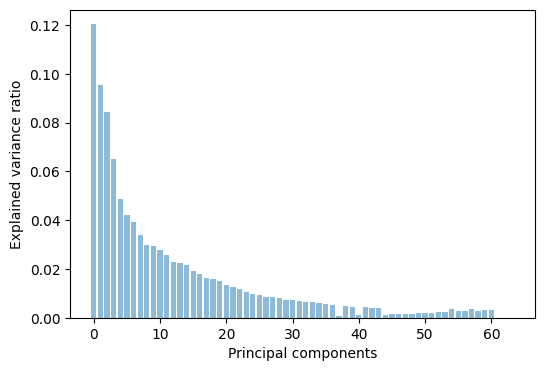

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar(range(len(explained_variances)), explained_variances,
        alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [12]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = Y
res.head()

,PC1,PC2,Y
0,-1.914214,0.954502,0
1,-0.588980,-0.924636,1
2,-1.302039,0.317189,2
3,3.020770,0.868772,3
4,-4.528949,1.093480,4


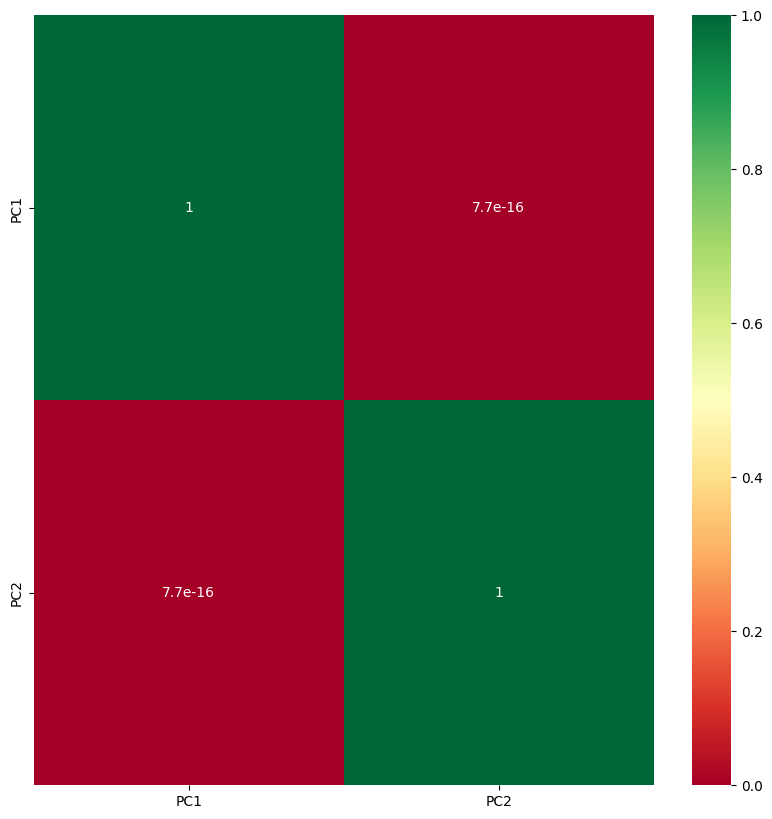

In [13]:
import seaborn as sns
plt.figure(figsize=(10,10))
X=res[["PC1","PC2"]]
p=sns.heatmap(X.corr(),
annot=True,cmap='RdYlGn')

<Axes: xlabel='PC1', ylabel='PC2'>

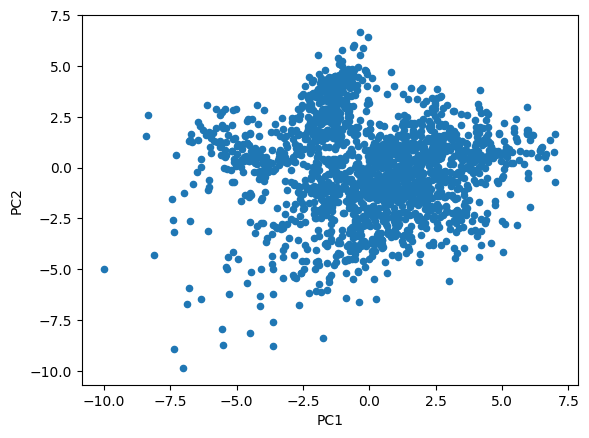

In [15]:
res.plot(kind="scatter", x="PC1",
y="PC2")

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [18]:
from scipy.linalg import svd
u,s,v= svd(X)
sigma=np.diag(s)
print(sigma)
X_new = np.dot(u[:, :2], sigma[:2, :2])
print(X_new)

[[114.85302699   0.        ]
 [  0.         102.37451345]]
[[-1.91421366  0.95450157]
 [-0.58898033 -0.9246358 ]
 [-1.30203906  0.31718883]
 ...
 [-1.02259599  0.14791087]
 [-1.07605522  0.38090625]
 [ 1.25770233  2.22759088]]
